
<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Introdução à Astrofísica e Cosmologia

## A Esfera Celeste

**Luciano Barosi**

## Introdução ao Curso

A astronomia é a mais antiga atividade humana registrada, devido a importância da observação dos astros para as medidas de tempo tão necessárias à Agricultura.

Mas a primeira observação de cada um de nós, em nossas próprias vidas, é de uma estrela importante para nós:  Sol.

Alguns de nós observam mais ou menos este fenômeno da natureza, e no mundo tecnológico de hoje, cada vez menos. Mas observações muito simples com o Sol podem nos oferecer importantes descobertas.

Vamos retomar aqui algumas observações feitas por Erathostenes (Cirene, 276 a.C. — Alexandria, 194 a.C.) que demonstrou que a Terra é redonda com o uso simples da trigonometria e da posição do Sol.

Talvez o fato de observarmos pouco o Sol seja o motivo para o aumento do número de terraplanistas hoje!

### A Experiência de Erathostenes

O código Mathematica abaixo obtem as posições das duas cidades que Eratóstenes utilizou para a sua medida, Alexandria e Aswan. Mostramos a medida em um dia em 200a.c. *(esta é uma medida que muda com o tempo, você sabe por que?*

Mostramos a posição do Sol próximo ao meio dia em cada um dos locais, em diferentes sistemas de coordenadas.

Usando a medida de Erathostenes calculamos o Raio da Terra e comparamos com o valor oficial atual.


In [56]:
Cidades = {{"Alexandria", "Alexandria", "Egypt"}, {"Aswan", "Aswan", 
    "Egypt"}};
Coordenadas = CityData[#, "Coordinates"] & /@ Cidades;
Dia = DateObject[{-200, 6, 21}, TimeZone -> 2];
MeioDia = DateObject[{-200, 6, 21, 11, 45, 0}, TimeZone -> 2];
PosicaoSol = 
 SunPosition[#, MeioDia, CelestialSystem -> "Equatorial"] & /@ 
  Coordenadas
PosicaoSol = SunPosition[#, MeioDia] & /@ Coordenadas
Distancia = GeoDistance @@ Coordenadas
MedidaAngulo = 7.2;
Circunferencia = 360*Distancia/MedidaAngulo
Raio = Circunferencia/(2 Pi)
PlanetData["Earth", "Radius"]

{{5.854 hours of right ascension, 23.701 degrees}, 
 
>   {5.854 hours of right ascension, 23.701 degrees}}
{{160.54 degrees, 82.06 degrees}, {192.09 degrees, 89.61 degrees}}
843.628 kilometers
42181.4 kilometers
6713.38 kilometers
6371.009 kilometers

O Sol se move de um jeito diferente em cada latitude de nosso planeta e em cada dia. Podemos desenhar a trajetória do Sol no céu para momentos diferentes (chamado de analema) e podemos traçar a trajetória do Sol em um dia específico. (A **Eclíptica**).

Abaixo sobrepomos como dois observadores em Alexandria e Aswan descreveriam o movimento do Sol.

-Graphics3D-
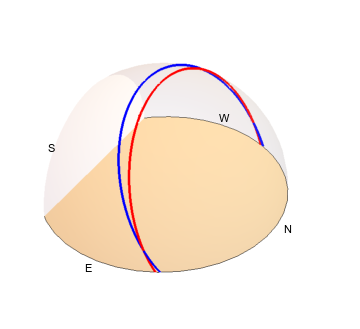

In [67]:
intervaloDiurno = 
  TimeZoneConvert[
     DateRange[Sunrise[#, Dia], Sunset[#, Dia], {1, "Minute"}], 2] & /@
    Coordenadas;
plot1 = Graphics[
   {Red, Point@Map[QuantityMagnitude,
      SunPosition[Coordenadas[[1]], intervaloDiurno[[1]]][
       "Values"], {2}]},
   	FrameLabel -> {"Azimute", "Altitude"}, Frame -> True,
   	FrameLabel -> "Posição do Sol em "];
coordsToCartesian = 
  Evaluate[CoordinateTransformData["Spherical" -> "Cartesian", 
     "Mapping", {1, \[Pi]/2 - (#2 Pi/180), 2 Pi - (#1 Pi/180)}]] &;
posicaoSolar[n_] := Map[QuantityMagnitude,
  SunPosition[Coordenadas[[n]], intervaloDiurno[[1]]]["Values"], {2}]
vista = Graphics3D[{Black, 
    Table[Text[{"W", "S", "E", "N"}[[j]], 
      1.1 {Cos[Pi/2 j], Sin[Pi/2 j], 0}], {j, 4}], Thickness[.007], 
    Red, Line@(coordsToCartesian @@@ posicaoSolar[2]), Blue, 
    Line@(coordsToCartesian @@@ posicaoSolar[1]), White, 
    Cylinder[{{0, 0, -.005}, {0, 0, 0}}], Opacity[.1], Sphere[]}, 
   PlotRange -> {0, 1}, Boxed -> False];
Show[vista]

-Graphics3D-
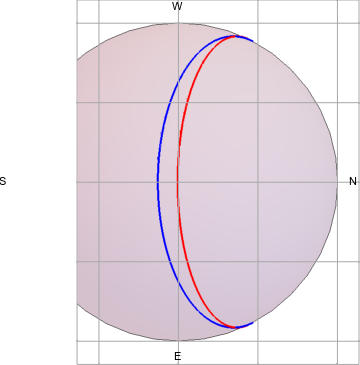

In [73]:
Show[vista, ViewPoint -> {0, 0, \[Infinity]}, FaceGrids -> All]

### Far Far Away

Antes de iniciarmos nosso estudo sistemático das coordenadas celestes, vamos mostrar a necessidade delas ilustrando com fenômenos mais recentemente estudados mas que ocorreram no passado distante do Universo. Nesse curso faremos este caminho, do Sol ao Big Bang.

In [3]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/yDiD8F9ItX0" frameborder="0" </iframe>')

/home/lbarosi/miniconda3/envs/cursos/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
